In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

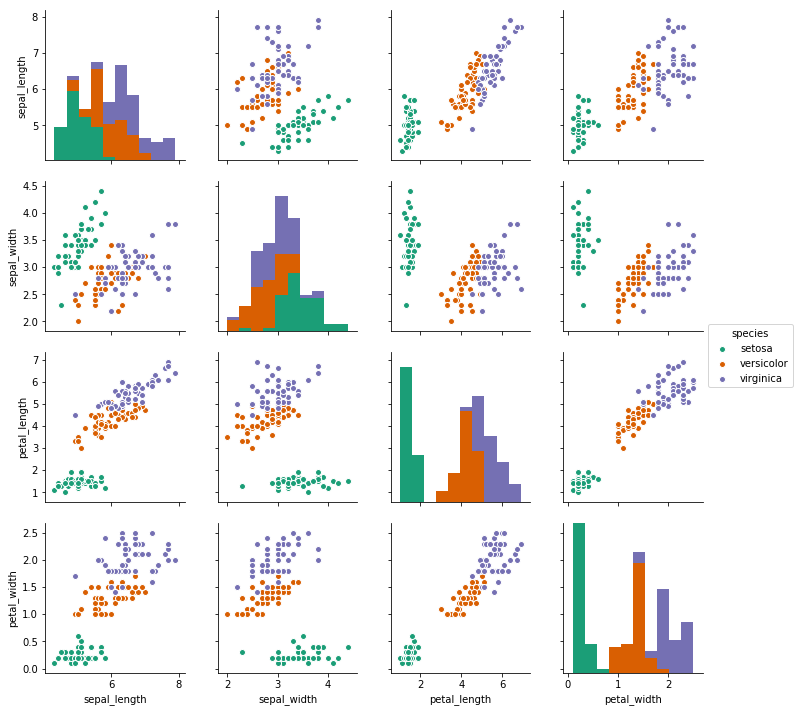

In [3]:
sns.pairplot(iris,hue='species',palette='Dark2')

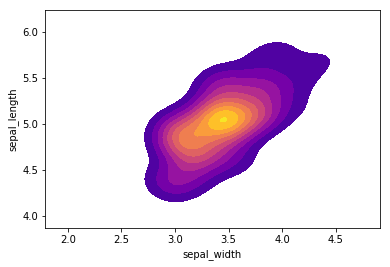

In [4]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
from sklearn.svm import SVC

In [8]:
svc_model = SVC()

In [9]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predictions = svc_model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 15  2]
 [ 0  0 14]]


In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.88      0.94        17
  virginica       0.88      1.00      0.93        14

avg / total       0.96      0.96      0.96        45



In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [16]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [17]:
grid_predictions = grid.predict(X_test)

In [18]:
print(confusion_matrix(y_test,grid_predictions))

[[14  0  0]
 [ 0 15  2]
 [ 0  0 14]]


In [19]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.88      0.94        17
  virginica       0.88      1.00      0.93        14

avg / total       0.96      0.96      0.96        45

